In [101]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import tweepy

In [2]:
#add link to article

In [9]:
#RANDOM GRAPH

def randomGraph(N,p):
    G=nx.Graph()
    G.add_nodes_from(range(N))
    for i in range(N):
        for j in range(N):
            if i<j:
                x=np.random.uniform(0,1)
                if x<p:
                    G.add_edge(i,j)
    return G




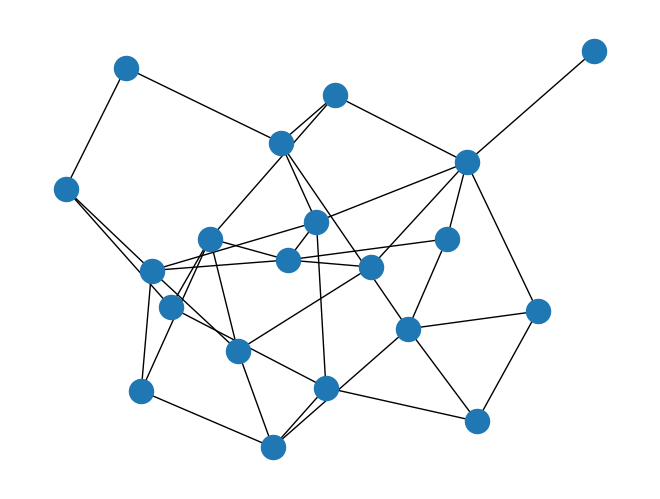

In [10]:
A=randomGraph(20,0.2)

nx.draw(A)

In [5]:
#Watts-Strogatz model
def watts_strogatz(N,K,p):
    if K%2 != 0:
        raise ValueError("K has to be even!")
    elif K>N:
        raise ValueError("K has to be lower than N!")
    G=nx.Graph()
    Ns=range(N)
    G.add_nodes_from(Ns)

    for i in range(N):
        for k in range(0,K//2):
            if i+k+1>=N:
                G.add_edge(Ns[i],Ns[k])
            else:
                G.add_edge(Ns[i],Ns[i+k+1])

    for e in G.edges():
        i=e[0]
        x=np.random.uniform(0,1)
        l=list(range(N))
        l.remove(i)
        if x<p:
            
            u=np.random.choice(l)
            G.remove_edge(e[0],e[1])
            G.add_edge(i,u)

    return G


    

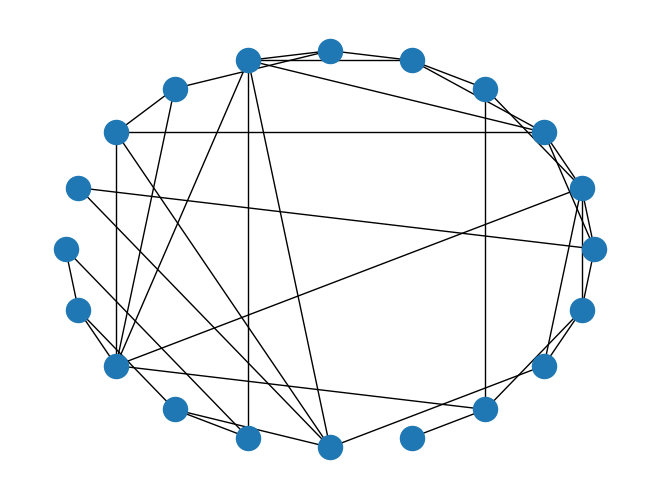

In [6]:
B=watts_strogatz(20,4,0.5)

nx.draw_circular(B)

In [12]:
#Barabasi-Albert model


In [97]:
def barabasi_albert(N,m,t):
    G=nx.Graph()
    #G.add_nodes_from(range(N))
    for i in range(N-1):
        G.add_edge(i,i+1)
    for j in range(t):
        new_node=max(nx.nodes(G))+1      
        sum_degree=sum([nx.degree(G,k) for k in nx.nodes(G)])
        ps=[nx.degree(G,n)/sum_degree for n in nx.nodes(G)]
        a=np.random.choice(nx.nodes(G),m,p=ps)
        G.add_node(new_node)
        for n in a:
            G.add_edge(new_node,n) 
        
    return G

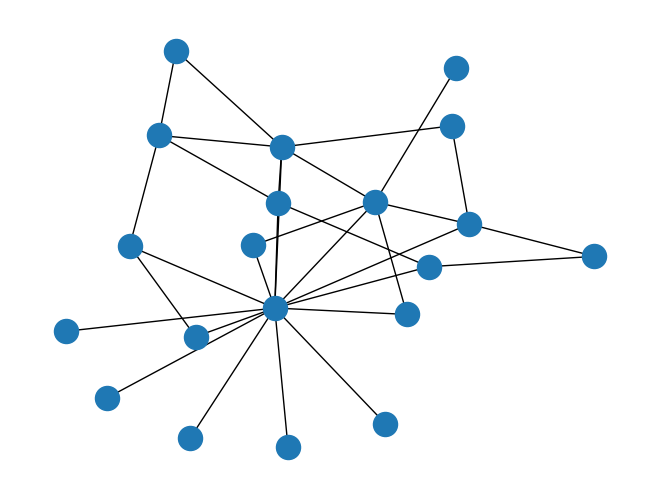

In [99]:
C=barabasi_albert(3,2,17)
nx.draw(C)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2be72a1a-6ede-4702-bb85-1f84486961ea' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>